In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [133]:
labels = ['broken_grain', 'full_grain', 'mixed_grain']
def classNoGen(img):
    if img[0] == 'b':
        return 0
    elif img[0] == 'f':
        return 1
    elif img[0] == 'm':
        return 2
    else:
        return -1
img_size = 224
def get_data(data_dir):
    data = [] 
    path = data_dir
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = classNoGen(img)
        img = cv2.imread(img_path)[...,::-1]
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, label])

    # for label in labels: 
    #     path = os.path.join(data_dir, label)
    #     class_num = labels.index(label)
    #     for img in os.listdir(path):
    #         try:
    #             img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
    #             resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
    #             data.append([resized_arr, class_num])
    #         except Exception as e:
    #             print(e)
    return np.array(data)

In [134]:
train= get_data('./train')
val = get_data('./train')

C:\Users\rohit\AppData\Local\Temp\ipykernel_17564\3889018655.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


c:\Users\rohit\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

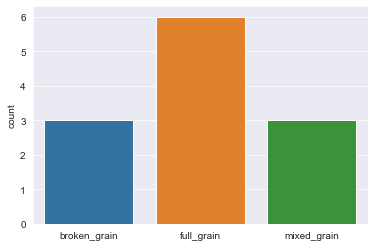

In [135]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("broken_grain")
    elif(i[1] == 1):
        l.append("full_grain")
    else:
        l.append("mixed_grain")

sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'broken_grain')

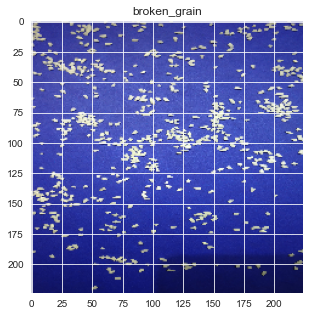

In [136]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'mixed_grain')

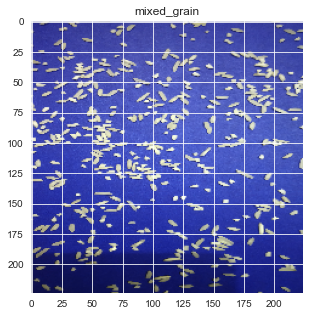

In [137]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

Text(0.5, 1.0, 'full_grain')

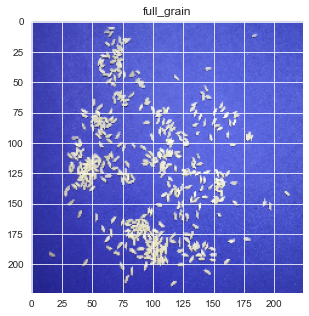

In [138]:
plt.figure(figsize = (5,5))
plt.imshow(train[3][0])
plt.title(labels[train[3][1]])

In [139]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [140]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [141]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(3,activation="softmax"))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 28, 28, 64)     

In [142]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

c:\Users\rohit\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [143]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500


c:\Users\rohit\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 1.0928 - accuracy: 0.4167 - val_loss: 1.0862 - val_accuracy: 0.5000
Epoch 2/500
1/1 [==============================] - 1s 700ms/step - loss: 1.1002 - accuracy: 0.0833 - val_loss: 1.0861 - val_accuracy: 0.5000
Epoch 3/500
1/1 [==============================] - 1s 667ms/step - loss: 1.0902 - accuracy: 0.4167 - val_loss: 1.0860 - val_accuracy: 0.5000
Epoch 4/500
1/1 [==============================] - 1s 597ms/step - loss: 1.0890 - accuracy: 0.3333 - val_loss: 1.0859 - val_accuracy: 0.5000
Epoch 5/500
1/1 [==============================] - 1s 624ms/step - loss: 1.0902 - accuracy: 0.2500 - val_loss: 1.0858 - val_accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 1s 608ms/step - loss: 1.0972 - accuracy: 0.4167 - val_loss: 1.0856 - val_accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 1s 587ms/step - loss: 1.1131 - accuracy: 0.3333 - val_loss: 1.0855 - val_accuracy: 0.5000
Epoch 8/500
1/1 [===========

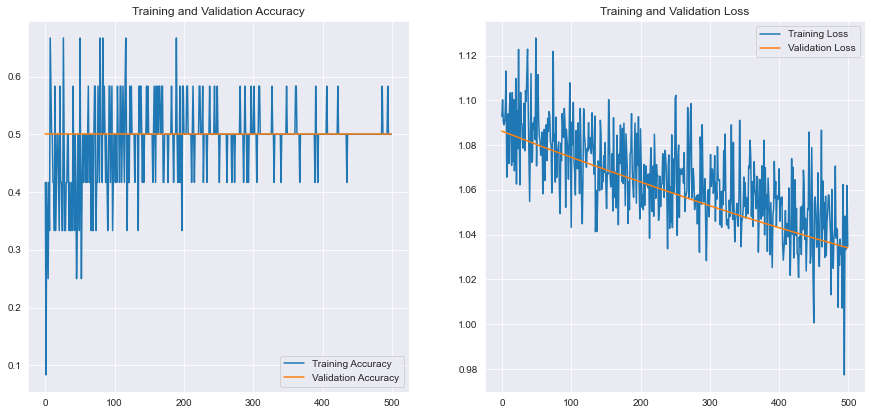

In [144]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [152]:
n_train = len(x_train)
n_train

12

In [156]:
simple_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [157]:
simple_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [160]:
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split = 0.5)

Epoch 1/20
1/1 [==============================] - 0s 402ms/step - loss: 1.0873 - accuracy: 0.5000 - val_loss: 1.0243 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 353ms/step - loss: 1.0522 - accuracy: 0.5000 - val_loss: 1.0245 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 361ms/step - loss: 1.0569 - accuracy: 0.5000 - val_loss: 1.0248 - val_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 358ms/step - loss: 1.0832 - accuracy: 0.5000 - val_loss: 1.0252 - val_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 377ms/step - loss: 1.0205 - accuracy: 0.5000 - val_loss: 1.0255 - val_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 358ms/step - loss: 1.0926 - accuracy: 0.5000 - val_loss: 1.0259 - val_accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 350ms/step - loss: 1.0414 - accuracy: 0.5000 - val_loss: 1.0263 - val_accuracy: 0.5000
Epoch 8/20
1/1 [====

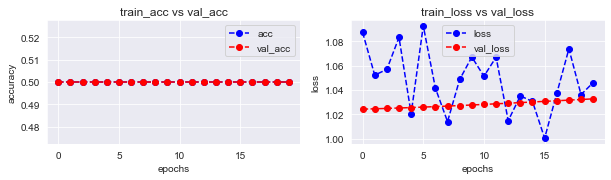

In [166]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)



In [163]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [169]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(str(class_names[labels[index]]))
    plt.show()

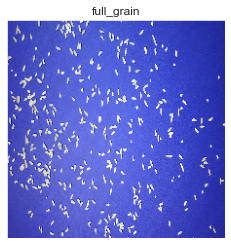

In [171]:
predictions = model.predict(x_val)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(labels, x_val, pred_labels)

In [172]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [173]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = x_val[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(labels,  mislabeled_images, mislabeled_labels)

## VGG Imagenet

In [174]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 15s 0us/step


In [175]:
train_features = model.predict(x_train)
validation_features = model.predict(x_val)

In [177]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = validation_features.shape
numFeatures = x * y * z

In [178]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

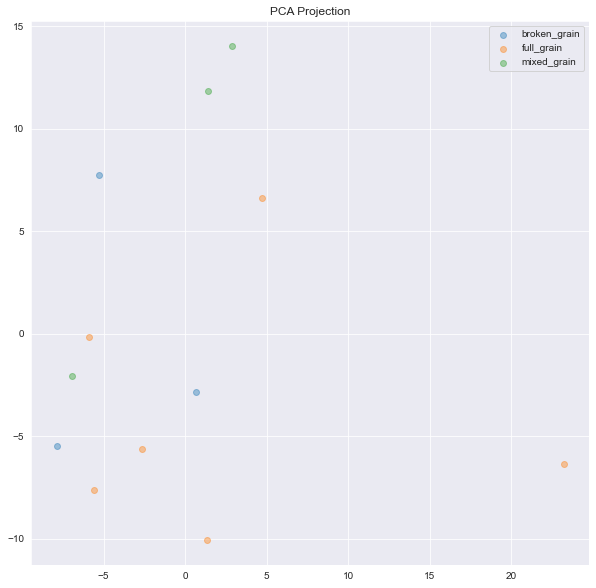

In [179]:
plt.subplots(figsize=(10,10))

for i, class_name in enumerate(labels):
    plt.scatter(C1[y_train == i][:1000], C2[y_train == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

In [186]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, y_train, batch_size=128, epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 357ms/step - loss: 1.6228 - accuracy: 0.4167
Epoch 2/15
1/1 [==============================] - 0s 10ms/step - loss: 0.9774 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 11ms/step - loss: 0.5084 - accuracy: 0.9167
Epoch 4/15
1/1 [==============================] - 0s 13ms/step - loss: 0.4154 - accuracy: 0.9167
Epoch 5/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2176 - accuracy: 1.0000
Epoch 6/15
1/1 [==============================] - 0s 15ms/step - loss: 0.1898 - accuracy: 1.0000
Epoch 7/15
1/1 [==============================] - 0s 13ms/step - loss: 0.1233 - accuracy: 1.0000
Epoch 8/15
1/1 [==============================] - 0s 10ms/step - loss: 0.0659 - accuracy: 1.0000
Epoch 9/15
1/1 [==============================] - 0s 10ms/step - loss: 0.0428 - accuracy: 1.0000
Epoch 10/15
1/1 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 1.0000
Epoch 11/15
1/1 [===========

In [187]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [195]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [196]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], y_train[train_idx], batch_size=128, epochs=10, validation_split=0.2))

Epoch 1/10
1/1 [==============================] - 0s 411ms/step - loss: 0.8643 - accuracy: 0.7143 - val_loss: 5.1355 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 35ms/step - loss: 1.2288 - accuracy: 0.7143 - val_loss: 4.6660 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 33ms/step - loss: 0.8908 - accuracy: 0.8571 - val_loss: 4.3732 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 35ms/step - loss: 0.3358 - accuracy: 0.8571 - val_loss: 3.9119 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 41ms/step - loss: 0.1272 - accuracy: 0.8571 - val_loss: 3.2642 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 36ms/step - loss: 0.1215 - accuracy: 1.0000 - val_loss: 3.1419 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 33ms/step - loss: 0.1739 - accuracy: 1.0000 - val_loss: 3.3314 - val_accuracy: 0.0000e+0